Balaji Kartheek (200968080)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-28 17:18:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.217.9.208, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   257MB/s    in 0.3s    

2022-08-28 17:18:17 (257 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import tensorflow as tf

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

### Cats and Dogs Dataset

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## Horse and Zebra Dataset

In [ ]:
base_dir_1 = '/content/drive/MyDrive/Colab (Deep Learning)/Datasets/Horse and Zebra'
train_dir_1 = os.path.join(base_dir_1, 'train')
test_dir_1 = os.path.join(base_dir_1, 'test')

# Directory with our training cat pictures
train_horse_dir = os.path.join(train_dir_1, 'trainA')
train_zebra_dir = os.path.join(train_dir_1, 'trainB')


# Directory with our validation cat pictures
test_horse_dir = os.path.join(test_dir_1, 'testA')
test_zebra_dir = os.path.join(test_dir_1, 'testB')


In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(227, 227),batch_size=20,class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# horse and zebra 
train_generator_1 = train_datagen.flow_from_directory(
        train_dir_1, # This is the source directory for training images
        target_size=(227, 227),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1193 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
# Horse and zebra
test_generator = val_datagen.flow_from_directory(
        test_dir_1,
        target_size=(227, 227),
        batch_size=20,
        class_mode='categorical')

Found 0 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.930.jpg', 'cat.649.jpg', 'cat.458.jpg', 'cat.205.jpg', 'cat.78.jpg', 'cat.901.jpg', 'cat.303.jpg', 'cat.732.jpg', 'cat.593.jpg', 'cat.687.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


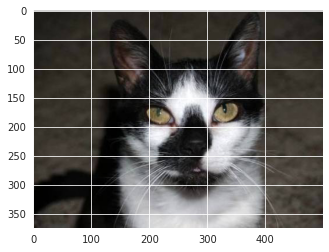

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[1])))

### Implement the AlexNet architecture. Train, test and report the performance of this model on the Cats_and_Dogs_Dataset, Horse2Zebra Dataset

# AlexNet Architecture

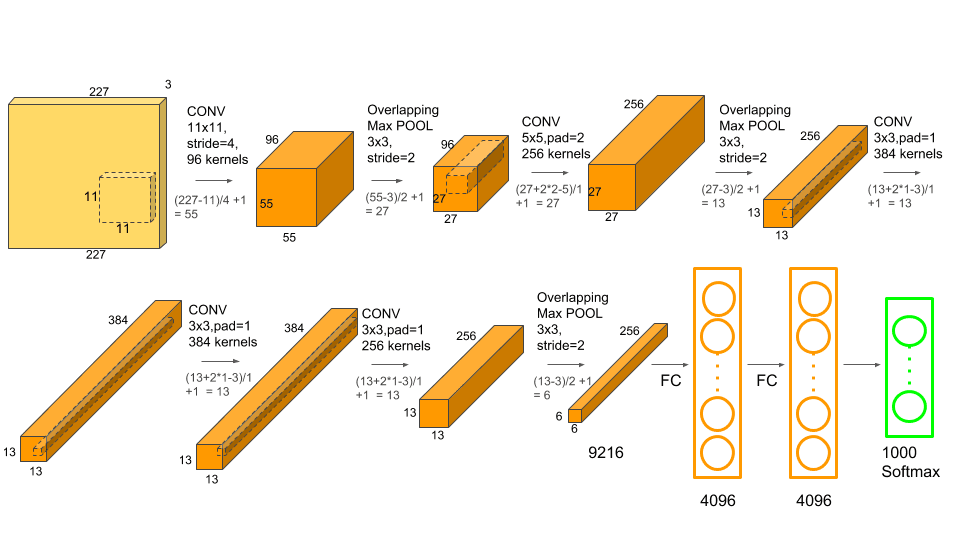

In [ ]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),strides=(4, 4), activation="relu",input_shape=(227, 227, 3)))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))

model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"))  # h1
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"))  # h2
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1820, activation="relu",name = "Hidden_Layer_3"))  #h3
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation="sigmoid",name = "Output_Layer")) # output layer

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_30 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_31 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                      

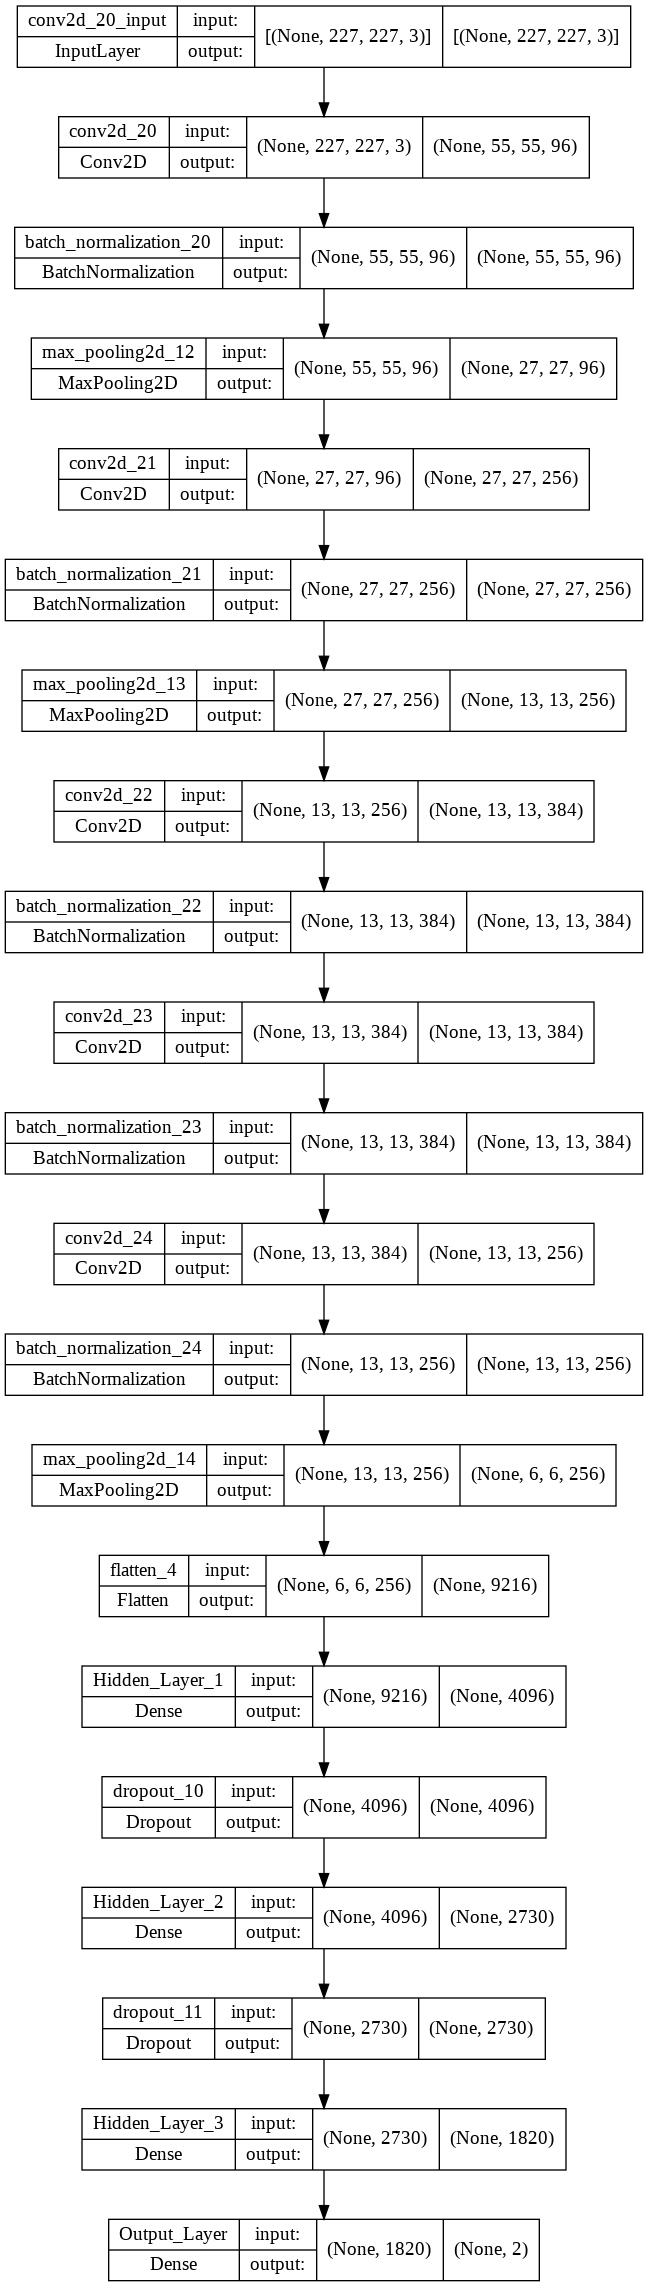

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history_cats_dogs = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/20
100/100 [==============================] - 11s 107ms/step - loss: 1.7830 - accuracy: 0.5150 - val_loss: 0.6959 - val_accuracy: 0.5120
Epoch 2/20
100/100 [==============================] - 10s 104ms/step - loss: 1.2707 - accuracy: 0.5350 - val_loss: 0.6796 - val_accuracy: 0.5720
Epoch 3/20
100/100 [==============================] - 10s 104ms/step - loss: 1.0926 - accuracy: 0.5435 - val_loss: 0.6677 - val_accuracy: 0.5880
Epoch 4/20
100/100 [==============================] - 10s 103ms/step - loss: 0.9638 - accuracy: 0.5785 - val_loss: 0.6678 - val_accuracy: 0.6020
Epoch 5/20
100/100 [==============================] - 10s 103ms/step - loss: 0.9113 - accuracy: 0.5625 - val_loss: 0.6409 - val_accuracy: 0.6180
Epoch 6/20
100/100 [==============================] - 10s 104ms/step - loss: 0.8825 - accuracy: 0.5740 - val_loss: 0.6757 - val_accuracy: 0.5910
Epoch 7/20
100/100 [==============================] - 10s 104ms/step - loss: 0.8170 - accuracy: 0.6015 - val_loss: 0.6325 - val_ac

AlexNet for cats and Dogs


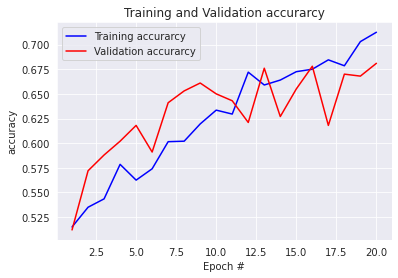

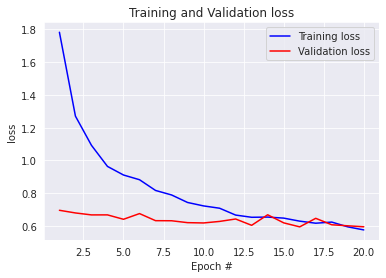

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history_cats_dogs.history['accuracy']
val_acc = history_cats_dogs.history['val_accuracy']
loss = history_cats_dogs.history['loss']
val_loss = history_cats_dogs.history['val_loss']

epochs = range(1, len(acc) + 1)

print("AlexNet for cats and Dogs")

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



## Horse and Zebra Dataset

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),strides=(4, 4), activation="relu",input_shape=(227, 227, 3)))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))

model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))

model.add(layers.BatchNormalization())

model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"))  # h1
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"))  # h2
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1820, activation="relu",name = "Hidden_Layer_3"))  #h3
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation="sigmoid",name = "Output_Layer")) # output layer

model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_94 (Bat  (None, 55, 55, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_95 (Bat  (None, 27, 27, 256)      1024      
 chNormalization)                                                
                                                     

In [ ]:
history_horse_zebra = model.fit(
      train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
 60/100 [=================>............] - ETA: 42s - loss: 0.0068 - accuracy: 0.9983

100/100 [==============================] - 63s 637ms/step - loss: 0.0068 - accuracy: 0.9983


# VGG16 Architecture

## Cats and Dogs

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=True)
base_model.trainable = False #freeze the layers
base_model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              4100096   
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_3 (Dropout)         (None, 2730)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                

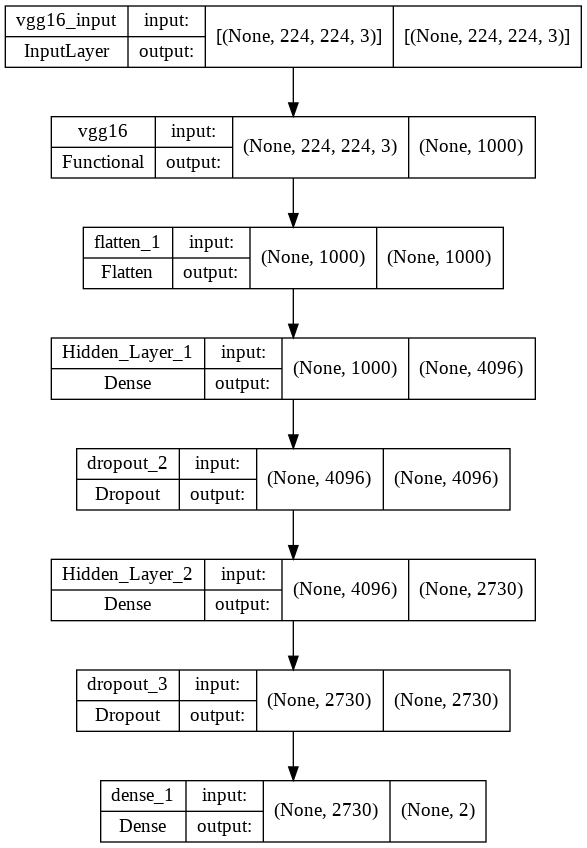

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history_cats_dogs = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
100/100 [==============================] - 22s 208ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6927 - val_accuracy: 0.5930
Epoch 2/5
100/100 [==============================] - 21s 213ms/step - loss: 0.6930 - accuracy: 0.4965 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/5
100/100 [==============================] - 21s 211ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6922 - val_accuracy: 0.6130
Epoch 4/5
100/100 [==============================] - 20s 202ms/step - loss: 0.6926 - accuracy: 0.5505 - val_loss: 0.6920 - val_accuracy: 0.5850
Epoch 5/5
100/100 [==============================] - 21s 213ms/step - loss: 0.6925 - accuracy: 0.5410 - val_loss: 0.6918 - val_accuracy: 0.6120


VGG16 for cats and Dogs


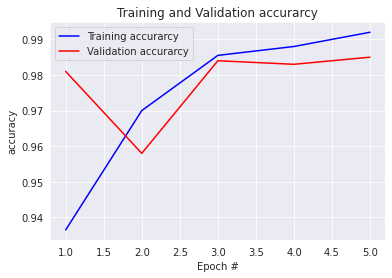

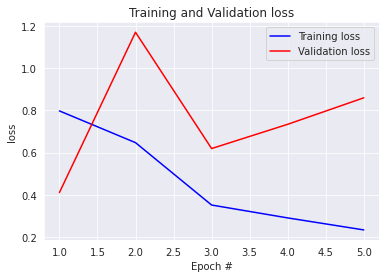

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history_cats_dogs.history['accuracy']
val_acc = history_cats_dogs.history['val_accuracy']
loss = history_cats_dogs.history['loss']
val_loss = history_cats_dogs.history['val_loss']

epochs = range(1, len(acc) + 1)

print("VGG16 for cats and Dogs")

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



## Horse and Zebra Dataset

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=True)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 flatten_13 (Flatten)        (None, 1000)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              4100096   
                                                                 
 dropout_19 (Dropout)        (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_20 (Dropout)        (None, 2730)              0         
                                                                 
 dense_14 (Dense)            (None, 2)               

In [ ]:
history_horse_zebra = model.fit(
train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
 60/100 [=================>............] - ETA: 6s - loss: 0.6920 - accuracy: 0.6899

100/100 [==============================] - 11s 99ms/step - loss: 0.6920 - accuracy: 0.6899


# MobileNetV2 Architecture

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              256905216 
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_5 (Dropout)         (None, 2730)              0         
                                                      

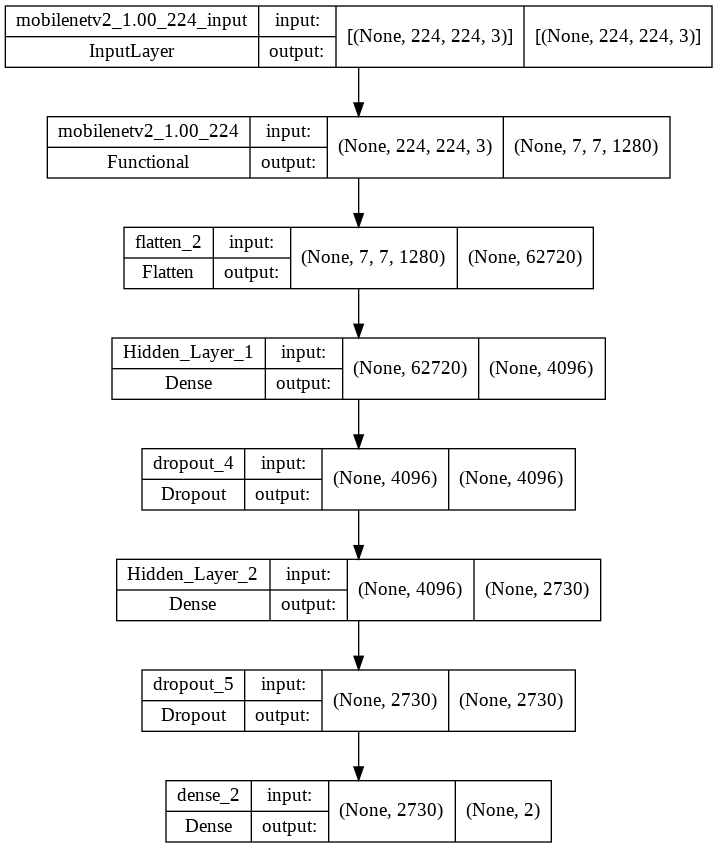

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history_cats_dogs = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
100/100 [==============================] - 16s 133ms/step - loss: 0.7979 - accuracy: 0.9365 - val_loss: 0.4102 - val_accuracy: 0.9810
Epoch 2/5
100/100 [==============================] - 12s 124ms/step - loss: 0.6472 - accuracy: 0.9700 - val_loss: 1.1713 - val_accuracy: 0.9580
Epoch 3/5
100/100 [==============================] - 13s 125ms/step - loss: 0.3511 - accuracy: 0.9855 - val_loss: 0.6192 - val_accuracy: 0.9840
Epoch 4/5
100/100 [==============================] - 13s 125ms/step - loss: 0.2899 - accuracy: 0.9880 - val_loss: 0.7343 - val_accuracy: 0.9830
Epoch 5/5
100/100 [==============================] - 13s 126ms/step - loss: 0.2329 - accuracy: 0.9920 - val_loss: 0.8601 - val_accuracy: 0.9850


MobileNett for cats and Dogs


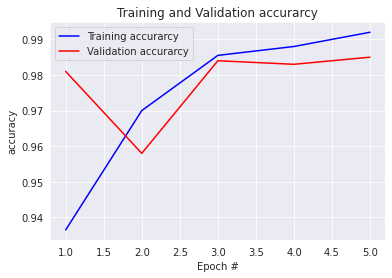

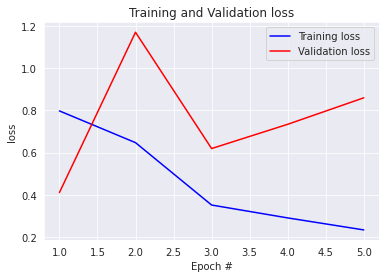

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history_cats_dogs.history['accuracy']
val_acc = history_cats_dogs.history['val_accuracy']
loss = history_cats_dogs.history['loss']
val_loss = history_cats_dogs.history['val_loss']

epochs = range(1, len(acc) + 1)

print("MobileNett for cats and Dogs")

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



# Horse and Zebra Dataset

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_14 (Flatten)        (None, 62720)             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              256905216 
                                                                 
 dropout_21 (Dropout)        (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_22 (Dropout)        (None, 2730)              0         
                                                     

In [ ]:
history_horse_zebra = model.fit(
train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
 60/100 [=================>............] - ETA: 3s - loss: 0.0219 - accuracy: 0.9933

100/100 [==============================] - 9s 60ms/step - loss: 0.0219 - accuracy: 0.9933


## GoogleNet Architecture

In [ ]:
from tensorflow.keras.applications import InceptionV3
base_model_1 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_1.trainable = False #freeze the layers
base_model_1.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
model_1 = tf.keras.Sequential([
    base_model_1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_1.summary()

model_1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              52429824  
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 74,234,658
Trainable params: 52,431,874
Non-trainable params: 21,802,784
_________________________________________________________________


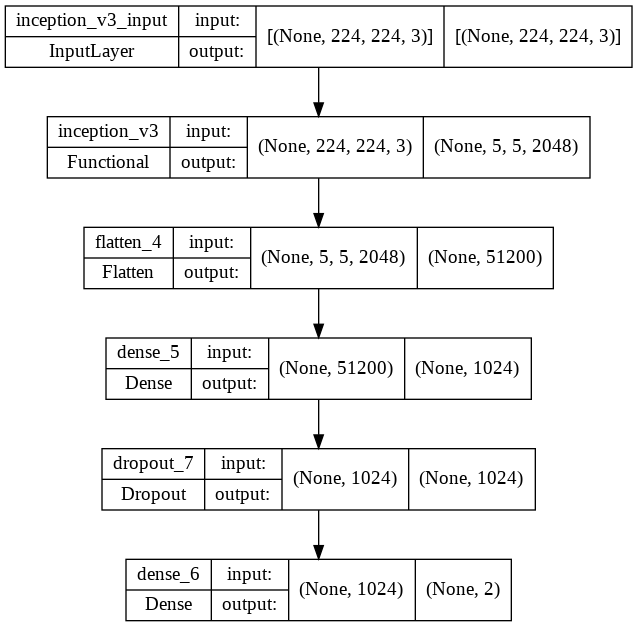

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,  show_shapes=True, show_layer_names=True)

In [ ]:
history = model_1.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 18s 132ms/step - loss: 0.6259 - accuracy: 0.9445 - val_loss: 0.0903 - val_accuracy: 0.9860
Epoch 2/2
100/100 [==============================] - 12s 121ms/step - loss: 0.1021 - accuracy: 0.9860 - val_loss: 0.0801 - val_accuracy: 0.9850


GoogleNet for cats and Dogs


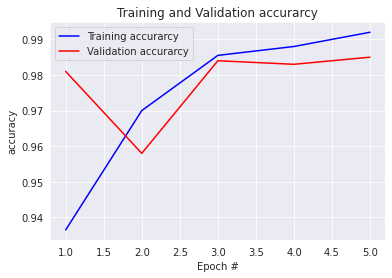

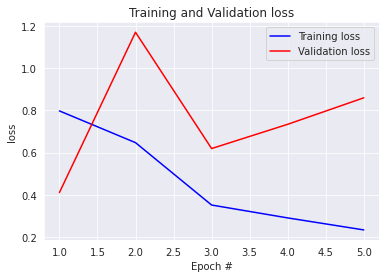

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history1 object
acc = history_cats_dogs.history['accuracy']
val_acc = history_cats_dogs.history['val_accuracy']
loss = history_cats_dogs.history['loss']
val_loss = history_cats_dogs.history['val_loss']

epochs = range(1, len(acc) + 1)

print("GoogleNet for cats and Dogs")

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()



# Horse and Zebra Dataset

In [ ]:
from tensorflow.keras.applications import InceptionV3
base_model_1 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model_1.trainable = False #freeze the layers
base_model_1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_181 (Conv2D)            (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_181 (Batch  (None, 111, 111, 32  96         ['conv2d_181[0][0]']             
 Normalization)                 )                                                      

In [ ]:
model_1 = tf.keras.Sequential([
    base_model_1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_1.summary()

model_1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_15 (Flatten)        (None, 51200)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              52429824  
                                                                 
 dropout_23 (Dropout)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 74,234,658
Trainable params: 52,431,874
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history = model_1.fit(
train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
 60/100 [=================>............] - ETA: 4s - loss: 0.0184 - accuracy: 0.9899

100/100 [==============================] - 10s 66ms/step - loss: 0.0184 - accuracy: 0.9899


## ResNet50 Architecture

In [ ]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_8 (Flatten)         (None, 131072)            0         
                                                                 
 dense_10 (Dense)            (None, 2)                 262146    
                                                                 
Total params: 23,849,858
Trainable params: 262,146
Non-trainable params: 23,587,712
_________________________________________________________________


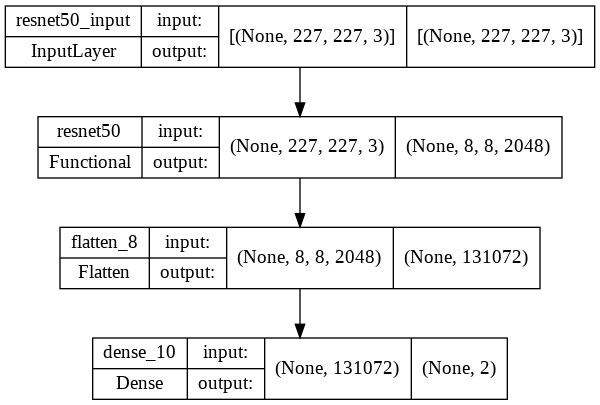

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history_horse_zebra = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
100/100 [==============================] - 18s 148ms/step - loss: 0.8572 - accuracy: 0.5255 - val_loss: 0.6936 - val_accuracy: 0.5840
Epoch 2/5
100/100 [==============================] - 13s 132ms/step - loss: 0.6928 - accuracy: 0.6075 - val_loss: 0.9796 - val_accuracy: 0.5010
Epoch 3/5
100/100 [==============================] - 13s 131ms/step - loss: 0.7292 - accuracy: 0.5895 - val_loss: 0.6241 - val_accuracy: 0.6500
Epoch 4/5
100/100 [==============================] - 13s 131ms/step - loss: 0.6661 - accuracy: 0.6150 - val_loss: 0.7861 - val_accuracy: 0.5220
Epoch 5/5
100/100 [==============================] - 13s 130ms/step - loss: 0.5935 - accuracy: 0.6735 - val_loss: 0.6640 - val_accuracy: 0.6320


# Horse and Zebra Dataset

In [ ]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(input_shape=(227,227,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 233, 233, 3)  0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 114, 114, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_16 (Flatten)        (None, 131072)            0         
                                                                 
 dense_18 (Dense)            (None, 2)                 262146    
                                                                 
Total params: 23,849,858
Trainable params: 262,146
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history_horse_zebra = model.fit(
train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=test_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
 60/100 [=================>............] - ETA: 4s - loss: 0.0529 - accuracy: 0.9832

100/100 [==============================] - 10s 64ms/step - loss: 0.0529 - accuracy: 0.9832


## EfficientNetB0 Architecture

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_11 (Flatten)        (None, 62720)             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              256905216 
                                                                 
 dropout_14 (Dropout)        (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_15 (Dropout)        (None, 2730)              0         
                                                                 
 dense_13 (Dense)            (None, 2)               

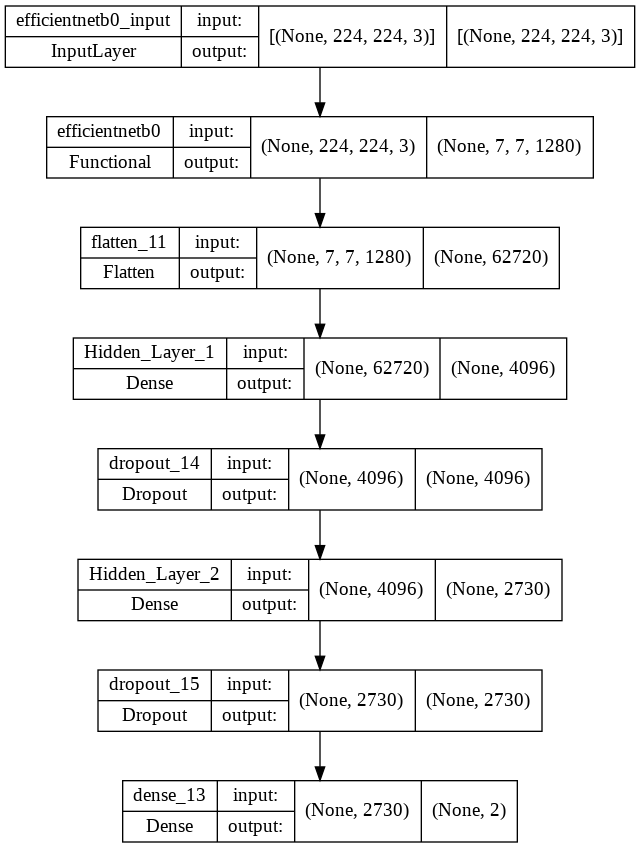

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
history_cats_dogs = model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/5
100/100 [==============================] - 21s 149ms/step - loss: 11.0137 - accuracy: 0.5065 - val_loss: 0.7229 - val_accuracy: 0.5000
Epoch 2/5
100/100 [==============================] - 14s 135ms/step - loss: 0.7820 - accuracy: 0.4905 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 3/5
100/100 [==============================] - 14s 135ms/step - loss: 0.7215 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
100/100 [==============================] - 14s 142ms/step - loss: 0.7280 - accuracy: 0.4915 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 13s 134ms/step - loss: 0.7021 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model.evaluate(validation_generator)

50/50 [==============================] - 4s 79ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931478977203369, 0.5]

# Horse and Zebra Dataset

In [ ]:
from keras.applications.efficientnet import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_14[0][0]']               
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(4096, activation="relu",name = "Hidden_Layer_1"),  # h1
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2730, activation="relu",name = "Hidden_Layer_2"),  # h2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_17 (Flatten)        (None, 62720)             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 4096)              256905216 
                                                                 
 dropout_24 (Dropout)        (None, 4096)              0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 2730)              11184810  
                                                                 
 dropout_25 (Dropout)        (None, 2730)              0         
                                                                 
 dense_19 (Dense)            (None, 2)               

In [ ]:
history_horse_zebra = model.fit(
train_generator_1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
 60/100 [=================>............] - ETA: 4s - loss: 0.0280 - accuracy: 0.9849

100/100 [==============================] - 17s 115ms/step - loss: 0.0280 - accuracy: 0.9849 - val_loss: 12428.2373 - val_accuracy: 0.5000
